
### **Welcome to Lab 4 :Relational Data and SQL**

This notebook explores the practical aspects of relational data with SQL using the AdventureWorks database from Microsoft on [Kaggle](https://www.kaggle.com/datasets/ukveteran/adventure-works?resource=download).

Note : The data has been modified to suit this lab and may not be the exact replica of the one from Microsoft.

Check notebook to see data transformation and cleaning [here ](https://colab.research.google.com/drive/1WFDIW7AqZHlgHMidIxXA1i65FDOuOcZA?usp=sharing)




**Getting Started**

1. Follow the [link](https://drive.google.com/drive/folders/1DuvKFB-fFxdJfL4sYVJEMRlrEWoG3uls?usp=share_link) to download or make a copy of the database, you can either save it on your drive or upload during runtime session. For this lab you only need to save the lab.db file
2. You can see the raw SQL queries for this lab  [here](https://docs.google.com/document/d/1riGAd1DDtTPNqs6_ZwFVoPxEwThdFwLVuPtmy9O0dfs/edit?usp=sharing) in plain text

In [ ]:
# If connecting with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# If connecting from uploaded file, create connection directly
connection = sqlite3.connect('lab.db')

In [ ]:
# If connecting from google drive, past the right path and create connection
connection = sqlite3.connect('/content/drive/MyDrive/lab4data/lab.db')

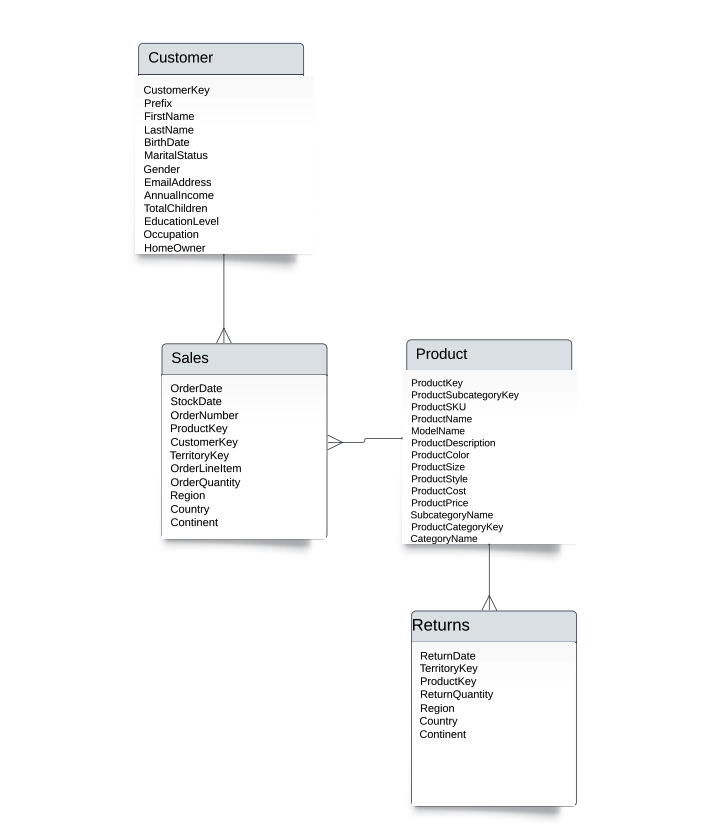

Quiz
1. What is the primary key of the customer table?
2. What can be an alternative primary key?

## Section 1 : Practising SQL basics

SELECT *  is used to select all columns in a table, otherwise you can select the specific columns to see

In [ ]:
sales_df=pd.read_sql_query("SELECT  * FROM sales", connection)
sales_df.head(5)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2016-01-01,2002-10-17,SO48797,385,14335,1,1,1,Northwest,United States,North America
1,2016-01-01,2002-09-30,SO48802,383,24923,9,1,1,Australia,Australia,Pacific
2,2016-01-01,2002-11-29,SO48801,326,15493,1,1,1,Northwest,United States,North America
3,2016-01-01,2002-11-16,SO48799,352,26708,4,1,1,Southwest,United States,North America
4,2016-01-01,2002-12-16,SO48798,369,23332,9,1,1,Australia,Australia,Pacific


In [ ]:
customer_df = pd.read_sql_query("SELECT * FROM customer", connection)
customer_df.head(5)

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,JON,YANG,4/8/1966,M,jon24@adventure-works.com,90000,2,Bachelors,Professional,Y
1,11001,EUGENE,HUANG,5/14/1965,S,eugene10@adventure-works.com,60000,3,Bachelors,Professional,N
2,11002,RUBEN,TORRES,8/12/1965,M,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Y
3,11003,CHRISTY,ZHU,2/15/1968,S,christy12@adventure-works.com,70000,0,Bachelors,Professional,N
4,11004,ELIZABETH,JOHNSON,8/8/1968,S,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Y


In [ ]:
product_df = pd.read_sql_query("SELECT * FROM products", connection)
product_df.head(5)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey,CategoryName
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900,Helmets,4,Accessories
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442,Helmets,4,Accessories
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000,Socks,3,Clothing
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000,Socks,3,Clothing
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442,Helmets,4,Accessories


In [ ]:
returns_df = pd.read_sql_query("SELECT * FROM returns", connection)
returns_df.head(5)

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Region,Country,Continent
0,2015-01-18,9,312,1,Australia,Australia,Pacific
1,2015-01-18,10,310,1,United Kingdom,United Kingdom,Europe
2,2015-01-21,8,346,1,Germany,Germany,Europe
3,2015-01-22,4,311,1,Southwest,United States,North America
4,2015-02-02,6,312,1,Canada,Canada,North America


## Statistical Operations

In [ ]:
# count
result= pd.read_sql_query("SELECT COUNT(customerkey)as count FROM customer", connection)
result['count'][0]

36296

In [ ]:
#average
result= pd.read_sql_query("SELECT AVG(AnnualIncome)as avg FROM customer", connection)
average_income = round(result['avg'][0],2)
average_income

57269.12

In [ ]:
#min , it can be used on text
result= pd.read_sql_query("SELECT MIN(CAST(AnnualIncome AS NUMERIC))as min FROM customer", connection)
result['min'][0]

10000

In [ ]:
#max, it can be used on text
result= pd.read_sql_query("SELECT MAX(CAST(AnnualIncome AS NUMERIC))as max FROM customer", connection)
result['max'][0]

170000

Alias is a temporary name given to a table or a column that can be used to reference it in another context, it can be used to make the columns or tables more readable

They can be used with the AS keyword or by placing it infront of the table name or column

## Filtering
There are different operators that can be used to filter data with SQL using the WHERE keyword

Operators |use
-----|-----
> |Greater than
< |Less than
= |Equal to
>= |Greater than or equal to
<= |Less than or equal to
<> | Not equal to
IN|In a list of values
NOT IN | Not in a list of values
BETWEEN |In a range of values
LIKE|For matching text

In [ ]:
result = pd.read_sql_query("SELECT ProductDescription AS NumberOfOrders FROM products  WHERE ProductDescription	like 'Universal%' ", connection)
result

WHERE vs HAVING

The WHERE cannot be used in agreggrations while  HAVING can be used

In [ ]:
# customers who have ordered more than once
result = pd.read_sql_query("SELECT CustomerKey,COUNT(CustomerKey)	 AS NumberOfOrders FROM sales GROUP BY CustomerKey	 Having COUNT(CustomerKey) > 1 ", connection)
result

## Date And Time Functions

%d		day of month: 00

%H		hour: 00-24

%j		day of year: 001-366

%m		month: 01-12

%M		minute: 00-59

%w		day of week 0-6 with Sunday==0

%W		week of year: 00-53

%Y		year: 0000-9999

In [ ]:
# Number of Orders for each month IN 2015
result = pd.read_sql_query("SELECT COUNT(OrderNumber)AS NumberOfOrders ,strftime('%m', OrderDate) AS month FROM sales WHERE OrderDate BETWEEN '2015-01-01' and '2015-12-01' GROUP BY month ", connection)
result

,NumberOfOrders,month
0,184,01
1,165,02
2,198,03
3,204,04
4,206,05
5,212,06
6,247,07
7,278,08
8,196,09
9,223,10


## Joins

In [ ]:
# Top 10 products, measured using the product with the highest quantity sold
result = pd.read_sql_query('''SELECT SUM(OrderQuantity) as QuantitySold, ProductName
                              FROM sales as a LEFT JOIN products as b on  a.ProductKey = b.ProductKey
                              GROUP BY ProductName
                              ORDER BY QuantitySold
                              DESC LIMIT 10 ''', connection)
result

,QuantitySold,ProductName
0,7967,Water Bottle - 30 oz.
1,5898,Patch Kit/8 Patches
2,5678,Mountain Tire Tube
3,4327,Road Tire Tube
4,4151,AWC Logo Cap
5,3960,Fender Set - Mountain
6,3810,Mountain Bottle Cage
7,3329,Road Bottle Cage
8,2740,Touring Tire Tube
9,2119,ML Mountain Tire


In [ ]:
# Top 10 products, measured using the product with the highest quantity sold using a right join
result = pd.read_sql_query('''SELECT SUM(OrderQuantity) as QuantitySold, ProductName
                              FROM products as b RIGHT JOIN sales as a on  a.ProductKey = b.ProductKey
                              GROUP BY ProductName
                              ORDER BY QuantitySold
                              DESC LIMIT 10 ''', connection)
result

In [ ]:
#right join
result= product_df.merge(sales_df, how="right", on='ProductKey')
result = result.groupby(['ProductName']).sum()
result=result.sort_values(by=['OrderQuantity'],ascending=False)
result['OrderQuantity'].head(10)

<ipython-input-15-11d86ead64dc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = result.groupby(['ProductName']).sum()


ProductName
Water Bottle - 30 oz.    7967
Patch Kit/8 Patches      5898
Mountain Tire Tube       5678
Road Tire Tube           4327
AWC Logo Cap             4151
Fender Set - Mountain    3960
Mountain Bottle Cage     3810
Road Bottle Cage         3329
Touring Tire Tube        2740
ML Mountain Tire         2119
Name: OrderQuantity, dtype: int64

In [ ]:
# What are the top 5 categories sold
result = pd.read_sql_query('''SELECT SUM(OrderQuantity) as QuantitySold, CategoryName
                              FROM sales as a LEFT JOIN products as b on  a.ProductKey = b.ProductKey
                              GROUP BY CategoryName
                              ORDER BY QuantitySold DESC
                              LIMIT 5 ''', connection)
result

,QuantitySold,CategoryName
0,57809,Accessories
1,13929,Bikes
2,12436,Clothing


In [ ]:
result = pd.read_sql_query("SELECT COUNT(OrderNumber)as SalesQuantity, Region FROM sales group by Region ", connection)
result

,SalesQuantity,Region
0,12409,Australia
1,6875,Canada
2,20,Central
3,5239,France
4,5289,Germany
5,27,Northeast
6,8267,Northwest
7,34,Southeast
8,11463,Southwest
9,6423,United Kingdom


## Window functions & CTEs

In [ ]:
#What is the top selling product in each region
result = pd.read_sql_query('''with a as (
                                           SELECT SUM(OrderQuantity) as QuantitySold ,ProductKey,Region,
                                           ROW_NUMBER() OVER(PARTITION BY Region ORDER BY COUNT(OrderNumber) desc) AS RankNum
                                           FROM sales  group by Region,ProductKey)

                                           SELECT * FROM a where rank_num=1''', connection)
result

,SalesQuantity,ProductKey,Region,rank_num
0,752,477,Australia,1
1,583,528,Canada,1
2,2,538,Central,1
3,330,477,France,1
4,374,477,Germany,1
5,4,528,Northeast,1
6,629,477,Northwest,1
7,5,477,Southeast,1
8,880,477,Southwest,1
9,460,477,United Kingdom,1


## CASE statements

In [ ]:
#Categorize into two groups, high sales and low sales based on the total value of the order for each product
result = pd.read_sql_query('''SELECT ProductName,
                              CASE WHEN SUM(OrderQuantity*ProductPrice) > 20000 THEN "High sales"
                                   WHEN SUM(OrderQuantity*ProductPrice) < 20000 THEN "Low Sales" END AS price_category
                                   FROM sales as a LEFT JOIN products as b on  a.ProductKey = b.ProductKey
                                   GROUP by a.ProductKey ORDER BY ProductName ''',connection)
result

,ProductName,price_category
0,AWC Logo Cap,High sales
1,All-Purpose Bike Stand,High sales
2,Bike Wash - Dissolver,Low Sales
3,"Classic Vest, L",Low Sales
4,"Classic Vest, M",Low Sales
...,...,...
125,"Touring-3000 Yellow, 62",High sales
126,Water Bottle - 30 oz.,High sales
127,"Women's Mountain Shorts, L",High sales
128,"Women's Mountain Shorts, M",High sales


## Sub Query

In [ ]:
# using a sub query get the total number of orders by customers in differenct occupations in the month of May
result = pd.read_sql_query(''' SELECT distinct Occupation,count(orderNumber) as NumberofOrders FROM sales
                                  LEFT JOIN customer on sales.CustomerKey = customer.CustomerKey
                              WHERE ProductKey in (Select ProductKey FROM sales where OrderDate BETWEEN '2015-01-18' AND  '2015-01-31' )  GROUP BY Occupation ORDER BY NumberofOrders DESC ''', connection)
result

,Occupation,NumberofOrders
0,Professional,522
1,Skilled Manual,420
2,Management,320
3,Clerical,316
4,Manual,138


an alternative to BETWEEN '2015-01-18' AND  '2015-01-31' will be to extract the month and the year and use that as a filter

## References

[SQLite](https://www.sqlite.org/index.html)

[SQLite SQL syntax](https://www.sqlite.org/lang.html)

[Python sqlite3 library](https://www.sqlite.org/lang.html)

[SQLite data types](https://learn.microsoft.com/en-us/dotnet/standard/data/sqlite/types)